In [56]:
import numpy as np
import matplotlib.pyplot as plt

# L'algorithme du gradient stochastique

L'algorithme du gradient stochastique permet d'optimiser des fonctions exprimées sous la forme d'une espérance: $f(x) = \mathbb E [g(x, W)]$.
 La justification théorique de cet algorithme est expliquée au chapitre 12 dans le polycopié du cours. On s'intéresse ici à quelques cas particuliers de cet algorithme. 
 
Dans la suite, on appellera $f$ la **fonction objectif** et $g$ la **fonction objectif partielle**.

## 1) Barycentre de points
 
Afin d'illustrer le fonctionnement de l'algorithme, on considère tout d'abord une fonction simple :
$$f(x) = \frac 1n \sum_{i=1}^n \lVert x-a_i \rVert^2$$
et on cherche à calculer $\min_{x \in \mathbb R^2} f(x)$.
Il n'est pas difficile de montrer que cette fonction convexe atteint un minimum global en $\bar a = \frac 1n \sum_{i=1}^n a_i$.

Par ailleurs, en notant $I$ un indice aléatoire choisi uniformément dans $\{1,...,n\}$, on peut écrire $f(x) = \mathbb E [g(x, I)]$ (on notera aussi $g(x, i) = \frac 1n \lVert x-a_i \rVert^2$), et optimiser cette fonction à l'aide du gradient stochastique. Dans la suite, on considère l'exemple des points $(a_i)_{i \leq 4}$ définis ci-dessous.

In [57]:
A = np.array([[-1,-1],
              [1,1],
              [-1,1],
              [1,-1]], dtype=float) # Liste de points

**TODO** : La fonction `f` prend un vecteur `x` et renvoie la valeur de la fonction $f$ définie ci-dessus. La fonction `g_grad` prend un vecteur `x` et un entier `i` et retourne le vecteur $\nabla g(x, i)$.

In [58]:
def f(x):
    result = 0
    n = 4
    for i in range(n):
        result += (np.linalg.norm(x - A[i]))**2
    result = result/n
    return result

def g_grad(x, i):
    n = 4
    result = 2*(x - A[i])/n
    return result

**Algorithme du gradient stochastique** : à chaque étape, on choisit au hasard un indice $I$, et on calcule le gradient de la fonction $g_I(x) = \frac{1}{n} \lVert x-a_I \rVert^2$. On effectue ensuite un pas de descente de gradient pour la fonction $g_I$ : $x' = x - \gamma \nabla g_{I}(x)$ (signe moins, car on *minimise* la fonction $f$).

**TODO** : Coder la fonction `gradient_stochastique_barycentre`, qui prend en entrée :
- un vecteur `x_0` (le point de départ de la descente)
- un nombre d'itérations `n_iter`
- un coefficient `gamma` pour la taille du pas de gradient

et retourne :
- la liste `X` des valeurs de $x$
- la liste `F` des valeurs de $f(x_k)$ au cours de l'algorithme

In [59]:
def gradient_stochastique_barycentre(x_0, n_iter, gamma):
    n = 4
    X = np.zeros((n_iter, 2))
    F = np.zeros(n_iter)
    X[0] = x_0
    F[0] = f(X[0])
    for t in range(1, n_iter):
        i = np.random.choice(n)
        grad_g = g_grad(x_0,i)
        x_0 = x_0 - gamma*grad_g
        X[t] = x_0
        F[t] = f(x_0)
    return X, F

On donne la fonction suivante, qui prend le résultat de `gradient_stochastique_barycentre` affiche la trajectoire de descente.

In [60]:
def plot_descente_barycentre(X, A):
    plt.scatter(A[:,0], A[:,1], c="r", s=100, label=r"$x_i$")
    plt.scatter(X[0,0], X[0,1], c="black", s=20, zorder=10, marker="s", label="Start")
    plt.scatter(X[-1,0], X[-1,1], c="black", s=20, zorder=10, marker="^", label="End")
    plt.plot(X[:,0], X[:,1], alpha=0.95)
    plt.axhline(0, color="gray", zorder=0, linestyle="dashed")
    plt.axvline(0, color="gray", zorder=0, linestyle="dashed")
    plt.xlim(-1.1,1.1)
    plt.ylim(-1.1,1.1)
    plt.legend()

Essayons d'abord une descente de 300 itérations avec $\gamma=0.2$. Que se passe-t-il ?

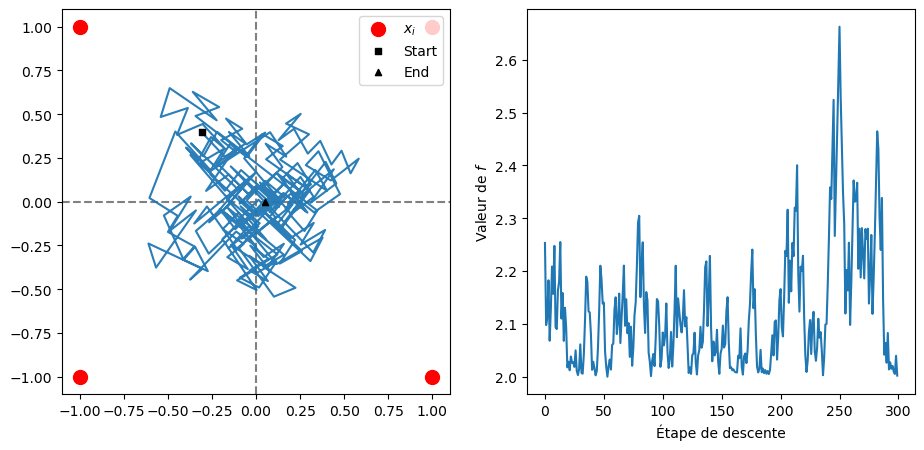

In [61]:
x_0 = 2*np.random.rand(2)-1 # Choisir un point au hasard dans le carré [-1,1]^2
X, F = gradient_stochastique_barycentre(x_0, 300, 0.2)

plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
plot_descente_barycentre(X, A)

plt.subplot(1,2,2)
plt.plot(F)
plt.xlabel("Étape de descente")
plt.ylabel("Valeur de $f$")
plt.show()

On fait maintenant varier le taux de descente $\gamma$, en gardant $n_{iter}=300$. Qu'observe-t-on ?

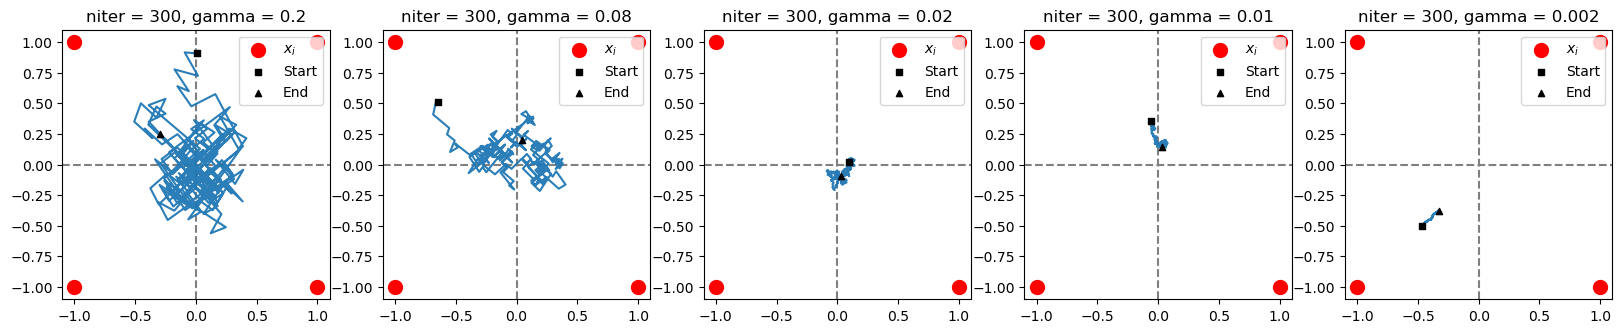

In [62]:
gamma_range = [0.2, 0.08, 0.02, 0.01, 0.002]
plt.figure(figsize=(20,3.5))
for i, gamma in enumerate(gamma_range):
    x_0 = 2*np.random.rand(2)-1 # Choisir un point au hasard dans le carré [-1,1]^2 pour commencer
    X, F = gradient_stochastique_barycentre(x_0, 300, gamma)
    plt.subplot(1, len(gamma_range), i+1)
    plt.title(f"niter = {300}, gamma = {gamma}")
    plot_descente_barycentre(X, A)
plt.show()

La valeur $\gamma=0.02$ semble donner le meilleur résultat. On fait à présent varier `n_iter`. Que se passe-t-il ?

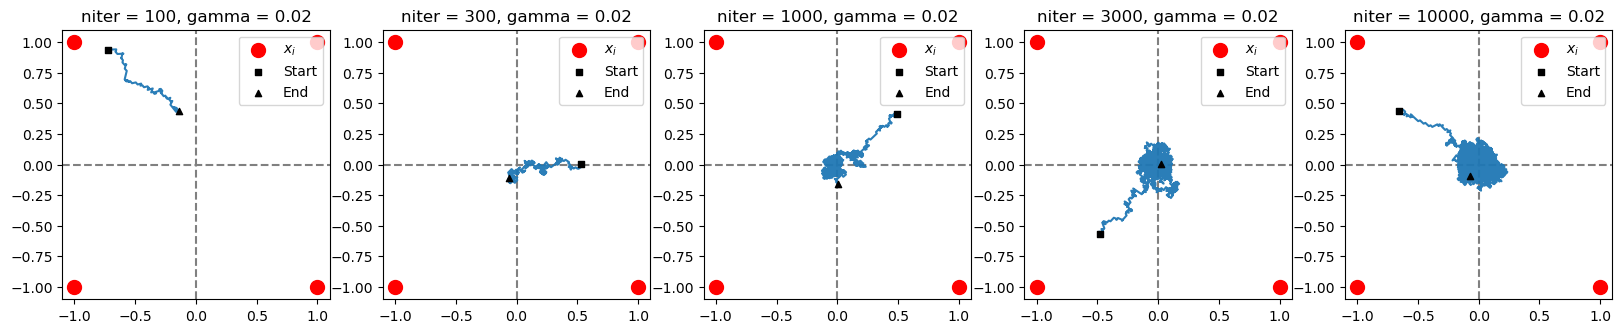

In [63]:
gamma = 0.02
n_iter_range = [100, 300, 1000, 3000, 10000]
plt.figure(figsize=(20,3.5))
for i, n_iter in enumerate(n_iter_range):
    x_0 = 2*np.random.rand(2)-1 # Choisir un point au hasard dans le carré [-1,1]^2 pour commencer
    X, F = gradient_stochastique_barycentre(x_0, n_iter, gamma)
    plt.subplot(1, len(gamma_range), i+1)
    plt.title(f"niter = {n_iter}, gamma = {gamma}")
    plot_descente_barycentre(X, A)
plt.show()

On répète l'expérience avec $\gamma = 0.04$ :

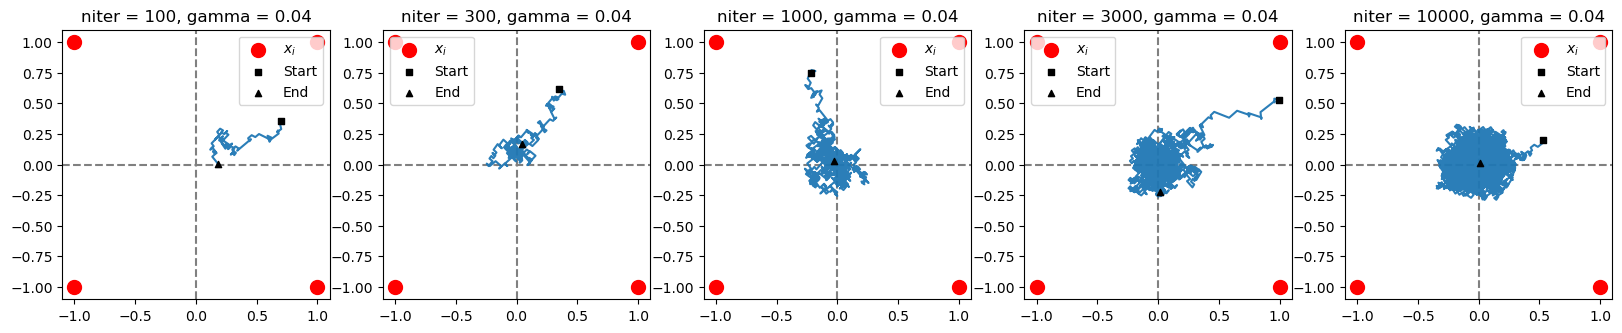

In [64]:
gamma = 0.04
n_iter_range = [100, 300, 1000, 3000, 10000]
plt.figure(figsize=(20,3.5))
for i, n_iter in enumerate(n_iter_range):
    x_0 = 2*np.random.rand(2)-1 # Choisir un point au hasard dans le carré [-1,1]^2 pour commencer
    X, F = gradient_stochastique_barycentre(x_0, n_iter, gamma)
    plt.subplot(1, len(gamma_range), i+1)
    plt.title(f"niter = {n_iter}, gamma = {gamma}")
    plot_descente_barycentre(X, A)
plt.show()

On constate que la chaîne de Markov $(x_t)$ converge vers une mesure invariante $\pi_\gamma$, dont la dispersion croît avec $\gamma$.

**Pas de gradient décroissant** La solution pour converger vers l'optimum consiste à faire varier $\gamma$ à chaque étape. La théorie garantit que, si $\sum_t \gamma_t = +\infty$ et $\sum_t \gamma_t^2 < +\infty$, alors la suite $(x_t)$ converge presque sûrement vers un point critique de la fonction objectif $f$.

On essaye donc $\gamma_t = \gamma_0/t^\alpha$. Pour satisfaire les contraintes théoriques, il suffit de prendre $1/2 < \alpha < 1$, par exemple $\alpha = 0.6$.

**TODO** : Coder la fonction `gradient_stochastique_barycentre_2`, qui adapte la fonction `gradient_stochastique_barycentre` pour inclure la décroissance du pas de gradient décroissant.

In [65]:
def gradient_stochastique_barycentre_2(x_0, n_iter, gamma_0):
    X = np.zeros((n_iter, 2))
    F = np.zeros(n_iter)
    X[0] = x_0
    F[0] = f(X[0])
    n = 4
    alpha = 0.6
    gamma = gamma_0
    for t in range(1, n_iter):
        i = np.random.choice(n)
        grad_g = g_grad(x_0,i)
        x_0 = x_0 - gamma*grad_g
        gamma = gamma_0 / (t**alpha)
        X[t] = x_0
        F[t] = f(x_0)
    return X, F

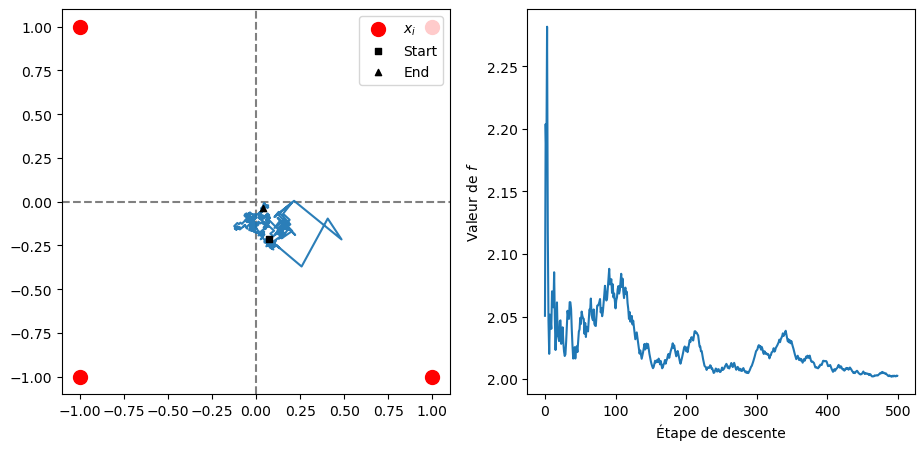

In [66]:
n_iter = 500
gamma_0 = 0.4
x_0 = 2*np.random.rand(2)-1 # Choisir un point au hasard dans le carré [-1,1]^2
X, F = gradient_stochastique_barycentre_2(x_0, n_iter, gamma_0)

plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
plot_descente_barycentre(X, A)

plt.subplot(1,2,2)
plt.plot(F)
plt.xlabel("Étape de descente")
plt.ylabel("Valeur de $f$")
plt.show()

## 2) Un problème d'interpolation

**Objectif** On s'intéresse à présent à un problème plus général. On se place dans l'intervalle $[0,1]$. On dispose d'un espace vectoriel de dimension finie $F$ de fonction simples sur $[0,1]$, et on aimerait approximer une fonction cible $f^*$ à l'aide de fonctions de $F$. De nombreuses approches sont possibles pour un tel problème, et une des plus classiques consiste à trouver la projection de $f^*$ sur $F$ selon une certaine distance. On cherche donc à résoudre le problème suivant :
$$\min_{f \in F} d(f, f^*)$$
où $d$ peut être par exemple la distance induite par la norme $L^2$. Ce problème est difficile à résoudre dans le cas général. Même dans le cas de la norme $L^2$ (où le problème revient à une projection orthogonale sur $F$), la résolution nécessite le calcul de produits scalaires de fonctions (et donc d'intégrales), qui peuvent rapidement devenir coûteux quand la dimension de l'espace de départ augmente.

Les problèmes d'interpolation interviennent constamment en pratique dans des cas plus complexes, notamment en statistiques et en Machine Learning, où l'espace de départ est de dimension très élevée et on ne connaît qu'un nombre restreint de valeurs de $f^*$ corrompues par du bruit. Ici, pour simplifier, on se place en dimension 1 et on suppose que l'on a accès à toutes les valeurs exactes de $f^*$.

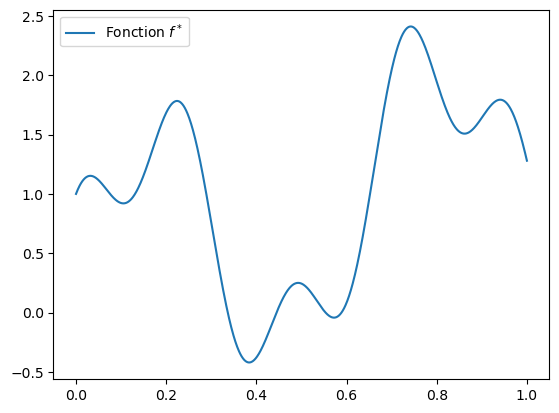

In [67]:
# Fonction f^* que l'on souhaite approximer
def f_star(x):
    return np.sin(10*x)+x**2+np.cos(13*x)**2

X = np.linspace(0,1,1000)
plt.plot(X, f_star(X), label="Fonction $f^*$")
plt.legend()
plt.show()

**Famille de fonctions** Dans cet exemple, on choisit pour $F$ l'espace engendré par une famille de courbes de Gauss : $F = \{f_\alpha | \alpha \in \mathbb R^m\}$, avec
$$f_\alpha(x) = \sum_{i=1}^m \alpha_i \exp(-|x-z_i|^2/2\sigma^2), \quad z_i = i/m, \sigma=0.05$$
On souhaite donc trouver $\alpha^*$ solution du problème $\min_{\alpha \in \mathbb R^m} d(f_\alpha, f^*)$.

**TODO** : Coder la fonction `f_simple`, qui prend en entrée :
- un nombre `x` (le point de départ de la descente)
- un vecteur `alpha` (les coefficients de pondération)

et retourne $f_\alpha(x)$.

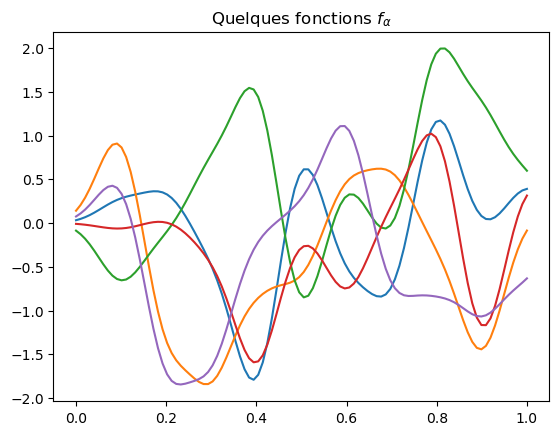

In [68]:
sigma = 0.05
def f_simple(x, alpha):
    m = len(alpha)
    f = 0
    for i in range(m):
        z_i = (i+1)/m
        f += alpha[i] * np.exp(-(((x - z_i)**2)/(2*sigma**2)))
    return f

# On génère quelques fonctions aléatoires
m = 10
X = np.linspace(0,1,100)
for i in range(5):
    alpha = np.random.randn(m)
    F = [f_simple(x, alpha) for x in X]
    plt.plot(X, F)
plt.title(r"Quelques fonctions $f_\alpha$")
plt.show()


**Reformulation du problème :** On s'intéresse au cas des normes $L^p$ ($p>1$). On a, à une racine près (qui ne joue pas de rôle dans le problème d'optimisation) :
$$d_p(f_\alpha, f^*) = \int_{[0,1]} |f_\alpha(x)-f^*(x)|^p \mathrm{d}x$$
Le gradient de cette fonction en $\alpha$ est une intégrale sur $[0,1]$, ce qui rend une descente de gradient classique inutilement coûteuse. On remarque cependant qu'on peut réécrire notre problème sous la forme :
$$d_p(f_\alpha, f^*) = \mathbb{E}[|f_\alpha(X)-f_\alpha(X)|^p] = \mathbb{E}[g_p(\alpha, X)], \quad X \sim \mathscr U([0,1])\,,$$
où $X$ suit une loi uniforme sur $[0,1]$ et $g_p(\alpha, x) = |f_\alpha(x)-f^*(x)|^p$. On se place ainsi dans le cadre de l'algorithme du gradient stochastique. On en déduit donc un algorithme naturel pour estimer $\alpha^*$ :
- Échantillonner $X_t \sim \mathscr U([0,1])$
- Calculer $\alpha_{t+1} = \alpha_t - \gamma_t \nabla_\alpha g_p(\alpha_t, X_t)$

**Calcul du gradient partiel** Dans le cas de la norme $L^p$, on a :
$$\frac{\partial g_p}{\partial \alpha_i}(\alpha, x) = p\cdot\mathrm{sign}(f_\alpha(x)-f^*(x)) \cdot \exp(-|x-z_i|^2/2\sigma^2) \cdot|f_\alpha(x)-f^*(x)|^{p-1}$$

On considère la fonction `g_grad`, qui prend en entrée :
- un nombre `x` (le point généré dans $[0,1]$)
- un vecteur `alpha` (les coefficients de pondération)
- un nombre `p` supérieur à 1 (pour la norme $L^p$)

et retourne $\nabla_\alpha g(\alpha, x)$.

In [70]:
def g_grad(x, alpha, p):
    sigma = 0.05  
    m = len(alpha)
    Z = np.arange(m) / m
    f = f_simple(x, alpha) - f_star(x)  # difference between approximated and target function
    grad = np.zeros_like(alpha)
    
    for i in range(m):
        # Exponential component as given in the derivative formula
        exp_component = np.exp(-((x - Z[i])**2) / (2 * sigma**2))
        # Gradient computation
        grad[i] = p * np.sign(f) * exp_component * (np.abs(f)**(p-1))
    
    return grad

On peut à présent implémenter numériquement l'algorithme du gradient stochastique. Afin de mesurer sa progression, on utilise la fonction `objectif_complet` suivante, qui approxime l'intégrale par une somme de Riemann.

In [71]:
def objectif_complet(alpha, p):
    res = 0
    for x in np.linspace(0,1,100):
        res += abs(f_simple(x, alpha)-f_star(x))**p
    return res/100

print("Exemple :", objectif_complet([0,0,1,0,-2], 2))

Exemple : 2.3173827638475384


**TODO** : Compléter la fonction `gradient_stochastique_interpolation`, qui prend en entrée :
- un vecteur `alpha_0` (le point de départ de la descente)
- un nombre d'itérations `n_iter`
- un coefficient `gamma_0` pour la taille du pas de gradient initial
- un nombre `p` supérieur à 1 (pour la norme $L^p$)
- un booléen `calcul_objectif`, qui choisit si la fonction totale `objectif_complet` est appelée au cours du calcul.

et retourne :
- la liste `Alpha` des valeurs de $\alpha$
- la liste `F` des valeurs de $d(f_\alpha, f^*)$ au cours de l'algorithme, vide si `calcul_objectif=False`

In [72]:
def gradient_stochastique_interpolation(alpha_0, n_iter, gamma_0, p, calcul_objectif=True):
    Alpha = np.zeros((n_iter, len(alpha_0)))
    F = []
    Alpha[0] = alpha_0
    gamma = gamma_0
    if calcul_objectif:
        F.append(objectif_complet(Alpha[0], p))
    for t in range(1, n_iter):
        x = np.random.uniform(0, 1)
        grad = g_grad(x, Alpha[t-1], p)
        Alpha[t] = Alpha[t-1] - gamma * grad
        gamma = gamma_0/(t**0.6)
        if t % 10 == 0 and calcul_objectif:
            F.append(objectif_complet(Alpha[t], p))
    return Alpha, F

On donne la fonction suivante pour afficher le résultat de l'interpolation :

In [73]:
def plot_descente_interpolation(alpha):
    X = np.linspace(0,1,100)
    m = len(alpha)
    plt.plot(X, f_star(X), label="Target function")
    f_alpha = [f_simple(x, alpha) for x in X]
    plt.plot(X, f_alpha, c="r", label="Interpolation")
    plt.legend(fontsize=12, loc=4)

On peut à présent tester la descente de gradient stochastique. Essayons le cas $\alpha \in \mathbb R^{10}$ ($m=10$).

**Remarque :** Si le code s'exécute trop lentement, désactiver l'option `calcul_objectif` accélère beaucoup les calculs.

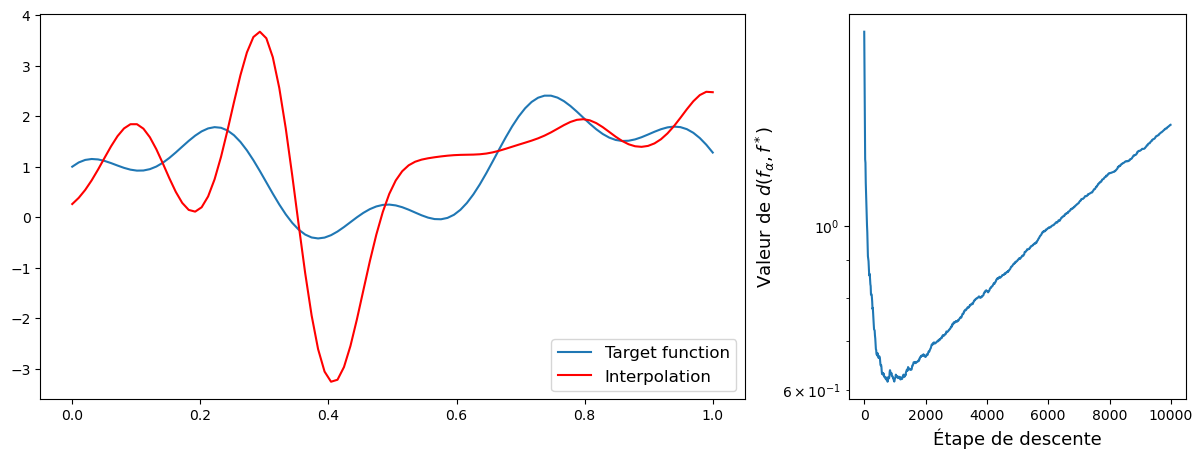

Valeur finale de la distance : 1.3682085577002667


In [74]:
# Exécuter le code plusieurs fois donne des résultats légèrement différents

n_iter = 10000
gamma_0 = 0.2
alpha_0 = np.random.randn(10)
p = 2
Alpha, F = gradient_stochastique_interpolation(alpha_0, n_iter, gamma_0, p, calcul_objectif=True)

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plot_descente_interpolation(Alpha[-1])

plt.subplot(1,4,3)
plt.semilogy(np.arange(0, n_iter, 10), F)
plt.xlabel("Étape de descente", fontsize=13)
plt.ylabel(r"Valeur de $d(f_\alpha, f^*)$", fontsize=13)
plt.show()

if len(F) > 0: print("Valeur finale de la distance :", F[-1])

Pour comparer, testons le cas $\alpha \in \mathbb R^{100}$ ($m=100$) :

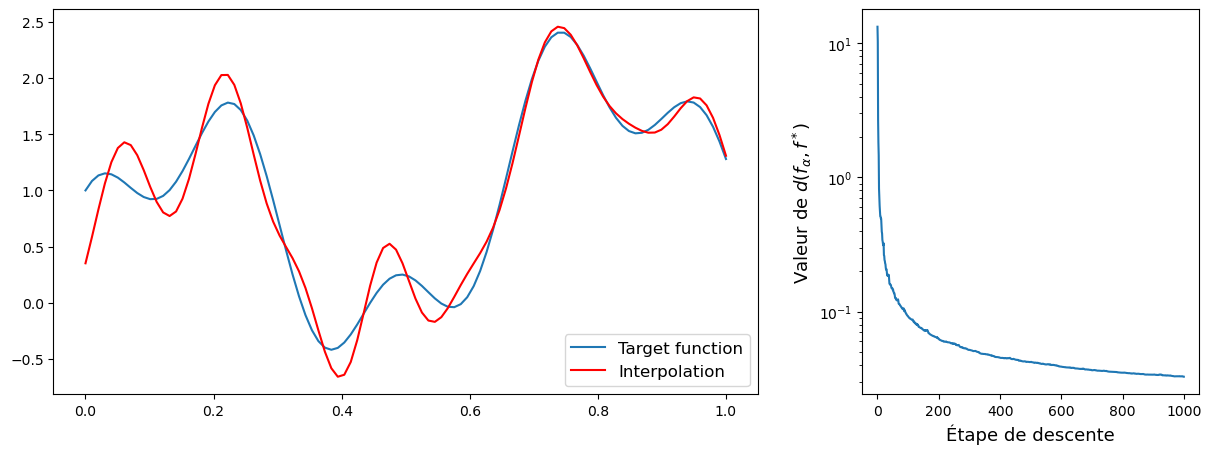

Valeur finale de la distance : 0.03269473783367436


In [75]:
n_iter = 10000
gamma_0 = 0.2
alpha_0 = np.random.randn(100)
p = 2
Alpha, F = gradient_stochastique_interpolation(alpha_0, n_iter, gamma_0, p, calcul_objectif=True)

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plot_descente_interpolation(Alpha[-1])

plt.subplot(1,4,3)
plt.semilogy(F)
plt.xlabel("Étape de descente", fontsize=13)
plt.ylabel(r"Valeur de $d(f_\alpha, f^*)$", fontsize=13)
plt.show()

if len(F) > 0: print("Valeur finale de la distance :", F[-1])

**TODO** : tester le code de cette section pour différentes valeurs de $\gamma_0$, $\sigma$, $m$, et de la norme $p$ utilisée. Selon les paramètres utilisés, on pourra ajuster $\gamma_0$ si la descente diverge ou converge trop lentement.